In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
#%load_ext autoreload 
#%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
np.random.seed(seed=99)

Let's cook some data up for a multi-class classification problem...

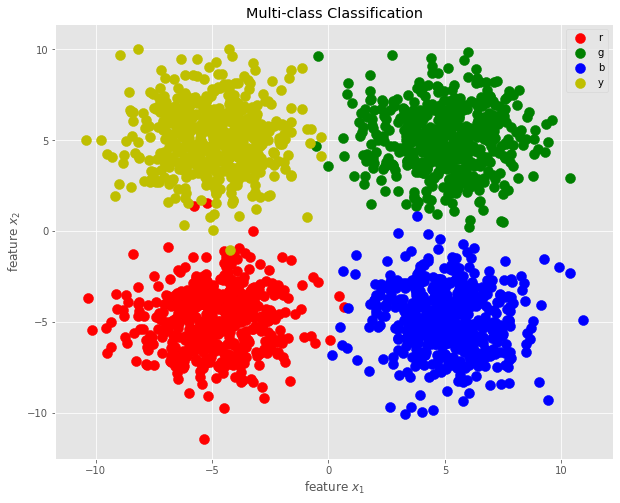

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
size=int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
size=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))

In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Linear')

In [7]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [8]:
rfc.train(X,Y)

In [9]:
len(rfc.trees)

10

In [10]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
[1. 1. 1. ... 4. 4. 4.]
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,495,0,2,3,500
2.0,0,498,0,2,500
3.0,1,1,498,0,500
4.0,1,0,0,499,500
All,497,499,500,504,2000


In [11]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)
print (acc)

500.0


In [12]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
# t.print_confusion_matrix(Ypt,Yt)

[1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [13]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)
print (acc)

250.0


### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

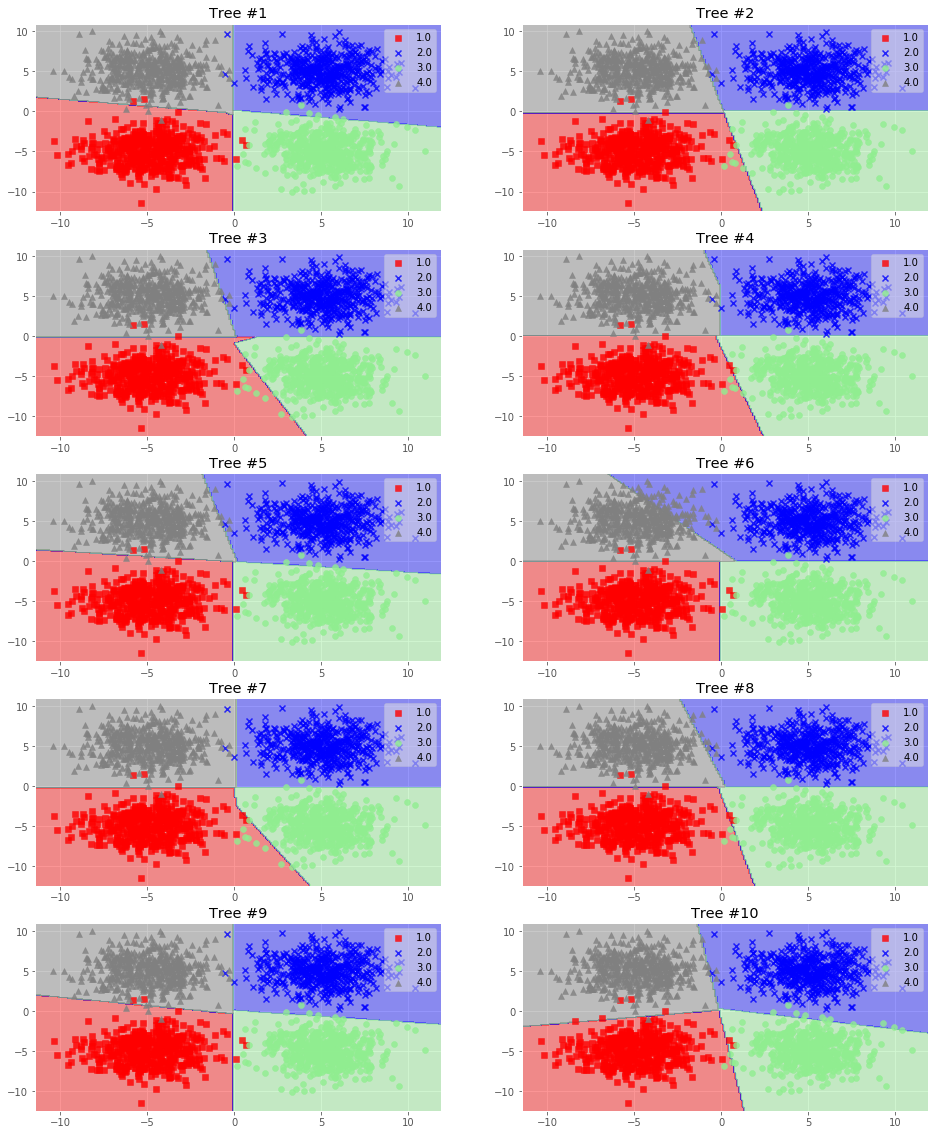

In [14]:
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## Lets Run on Nonlinear Data, The Spherical Examples...

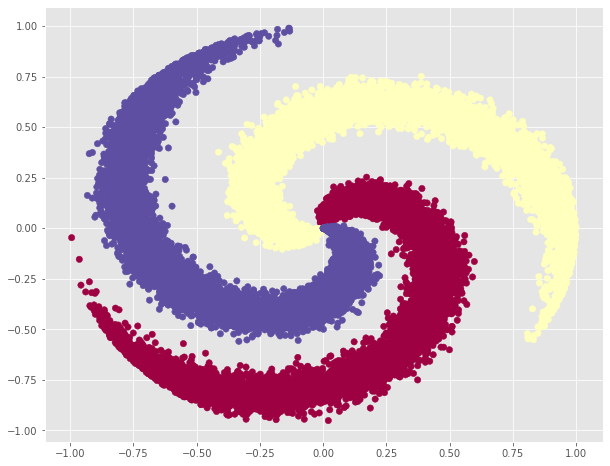

In [15]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [16]:
print (X.shape, Y.shape)

(30000, 2) (30000,)


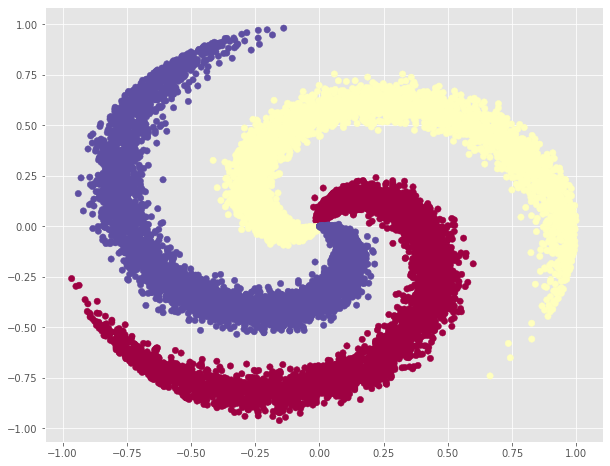

In [17]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [18]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [19]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 1 2]
[2 2 0 ... 2 2 1]
[2 2 2 ... 2 1 2]
[1 1 1 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[0 0 0 ... 2 1 2]
[2 2 2 ... 2 2 2]
[1 1 1 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 2 2]
[0 0 0 ... 2 2 2]
[1 1 1 ... 2 1 2]
[0 0 0 ... 2 1 2]
[2 2 2 ... 2 1 1]
(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9837,6,157,10000
1,58,9890,52,10000
2,18,20,9962,10000
All,9913,9916,10171,30000


In [20]:
#Testing Confusion Matrix
Ypt=rfc.predict(X)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 1 2]
[2 2 0 ... 2 2 1]
[2 2 2 ... 2 1 2]
[1 1 1 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[0 0 0 ... 2 1 2]
[2 2 2 ... 2 2 2]
[1 1 1 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 2 2]
[0 0 0 ... 2 2 2]
[1 1 1 ... 2 1 2]
[0 0 0 ... 2 1 2]
[2 2 2 ... 2 1 1]
(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,4902,6,92,5000
1,4935,0,65,5000
2,0,4948,52,5000
All,9837,4954,209,15000


In [21]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)
print (acc)

0.9896333333333334


(10000, 2)
[2 2 2 ... 1 1 0]
[1 1 1 ... 2 1 0]
[2 1 2 ... 1 1 0]
[2 1 1 ... 0 1 0]
[1 1 1 ... 0 0 0]
[2 1 1 ... 1 1 0]
[2 1 1 ... 1 1 0]
[2 1 1 ... 1 1 0]
[2 1 1 ... 0 1 0]
[2 1 1 ... 0 1 0]
[2 1 1 ... 1 1 0]
[2 1 1 ... 1 0 0]
[2 1 1 ... 1 0 0]
[2 1 1 ... 1 1 0]
[2 1 1 ... 0 1 0]
[2 2 2 ... 2 1 0]
[2 2 2 ... 1 1 0]
[2 1 1 ... 1 1 0]
[2 2 1 ... 0 1 0]
[2 1 1 ... 1 1 0]
[0, 1, 2]


AttributeError: 'AxesSubplot' object has no attribute 'hold'

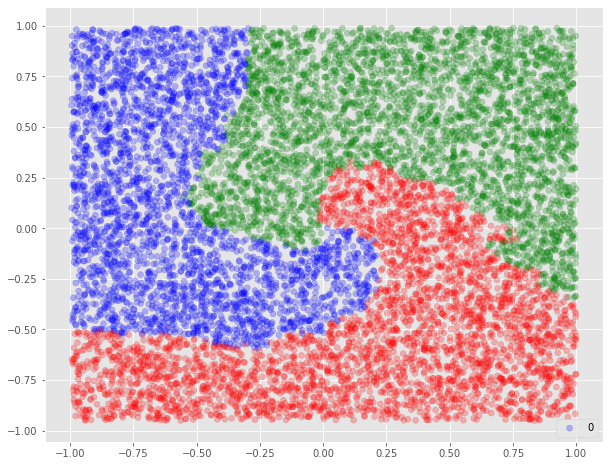

In [22]:
t.plot_points_range(rfc,X,Y)

## Find Best value of ntress   

(30000, 2) (30000,)
I am C=============== [10000 10000 10000]
I am C=============== [4430  397 6308]
I am C=============== [ 574  396 4415]
I am C=============== [ 574 3321]
I am C=============== [ 193 3321]
I am C=============== [ 193 1966]
I am C=============== [1355]
I am C=============== [381]
I am C=============== [ 396 1094]
I am C=============== [533]
I am C=============== [396 561]
I am C=============== [559]
I am C=============== [396   2]
I am C=============== [3856    1 1893]
I am C=============== [3214 1893]
I am C=============== [1697]
I am C=============== [1517 1893]
I am C=============== [1117   14]
I am C=============== [ 400 1879]
I am C=============== [642   1]
I am C=============== [5570 9603 3692]
I am C=============== [  25 5191 1638]
I am C=============== [2493 1629]
I am C=============== [1629]
I am C=============== [2493]
I am C=============== [  25 2698    9]
I am C=============== [5545 4412 2054]
I am C=============== [5545  446 2054]
I am C=============== [1

I am C=============== [ 24 205]
I am C=============== [24 19]
I am C=============== [186]
I am C=============== [  11 5473  229]
I am C=============== [4708 4288 1872]
I am C=============== [4537  806 1872]
I am C=============== [ 871  140 1714]
I am C=============== [   5    4 1691]
I am C=============== [866 136  23]
I am C=============== [3666  666  158]
I am C=============== [1126  113]
I am C=============== [2540  666   45]
I am C=============== [ 171 3482]
I am C=============== [10000 10000 10000]
I am C=============== [4466  167 6157]
I am C=============== [4346    1 4567]
I am C=============== [3363 4504]
I am C=============== [2280]
I am C=============== [1083 4504]
I am C=============== [ 209 3873]
I am C=============== [874 631]
I am C=============== [983   1  63]
I am C=============== [63]
I am C=============== [983   1]
I am C=============== [ 120  166 1590]
I am C=============== [120 496]
I am C=============== [118]
I am C=============== [  2 496]
I am C=============== [ 

[2 2 2 ... 1 2 2]
I am XXXXXX====== (15000, 2)
I am XXXXXX====== (15000, 2)
[0 0 0 ... 2 2 2]
I am XXXXXX====== (15000, 2)
I am XXXXXX====== (15000, 2)
[2 2 2 ... 2 2 2]
I am XXXXXX====== (15000, 2)
I am XXXXXX====== (15000, 2)
[0 0 0 ... 2 2 2]
I am XXXXXX====== (15000, 2)
I am XXXXXX====== (15000, 2)
[1 1 1 ... 2 2 2]
I am XXXXXX====== (15000, 2)
Trees= 5  and Accuracy= 0.9850666666666666
I am C=============== [10000 10000 10000]
I am C=============== [5318 6496 9991]
I am C=============== [2683]
I am C=============== [2635 6496 9991]
I am C=============== [ 207 5614 6435]
I am C=============== [ 163    4 4215]
I am C=============== [  44 5610 2220]
I am C=============== [  54 2180]
I am C=============== [  44 5556   40]
I am C=============== [2428  882 3556]
I am C=============== [ 316   55 3556]
I am C=============== [  11 2964]
I am C=============== [305  55 592]
I am C=============== [2112  827]
I am C=============== [2111]
I am C=============== [  1 827]
I am C=============== [4

KeyboardInterrupt: 

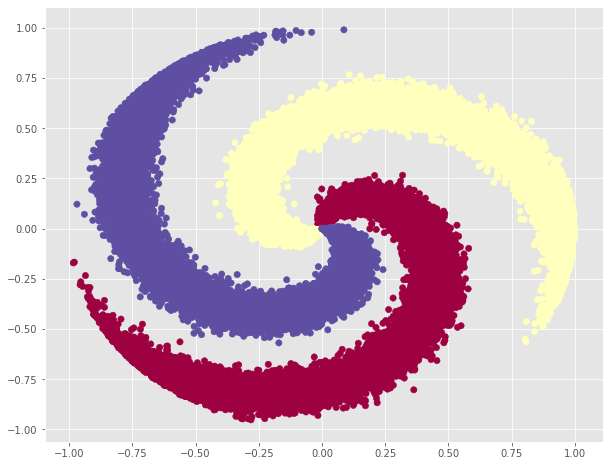

In [23]:
import tools as t
X,Y=t.get_spherical_data(N=10000)
print (X.shape, Y.shape)
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)

for tree in trees:
    rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print ("Trees=", tree, " and Accuracy=", acc)